In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [6]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [8]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [10]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [12]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [14]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [18]:
X_train.shape

(800, 4)

In [20]:
X_test.shape

(200, 4)

In [22]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [24]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Train the Random Forest model using the training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=1)

In [30]:
# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)


In [32]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 99.00%


# Confusion Matrix

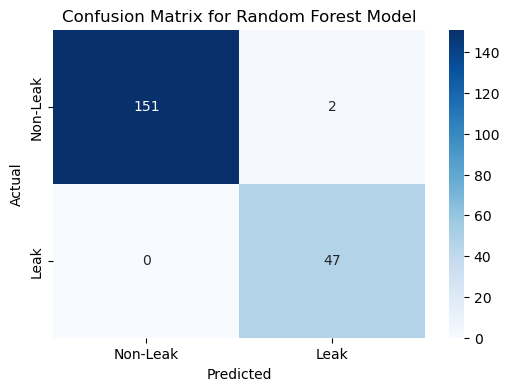

In [35]:
# Create confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Leak', 'Leak'], yticklabels=['Non-Leak', 'Leak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


# Classification Report

In [38]:
# Generate classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report for Random Forest:')
print(class_report_rf)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.96      1.00      0.98        47

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# Feature Importance

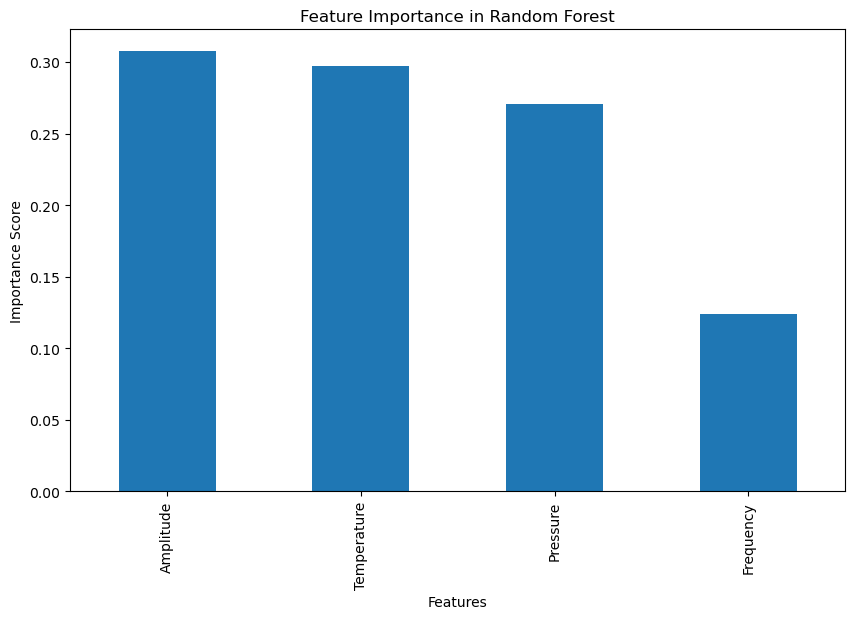

In [41]:
# Get feature importances
import pandas as pd

feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Visualize Random Forest Performance

ROC Curve to assess model discrimination.

Precision-Recall Curve to understand the balance between precision and recall.

Learning Curve to see how the performance changes as the size of the training data increases.

# Visualize Receiver Operating Characteristic (ROC) curve

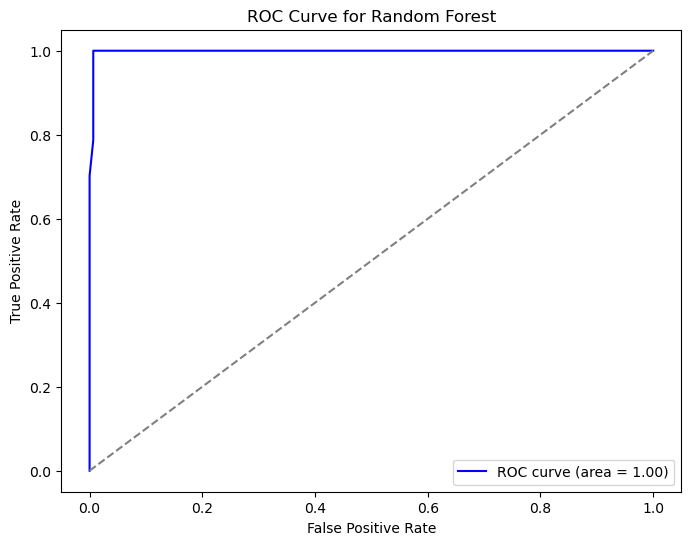

In [45]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (Leak)
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Visualize precision_recall curve

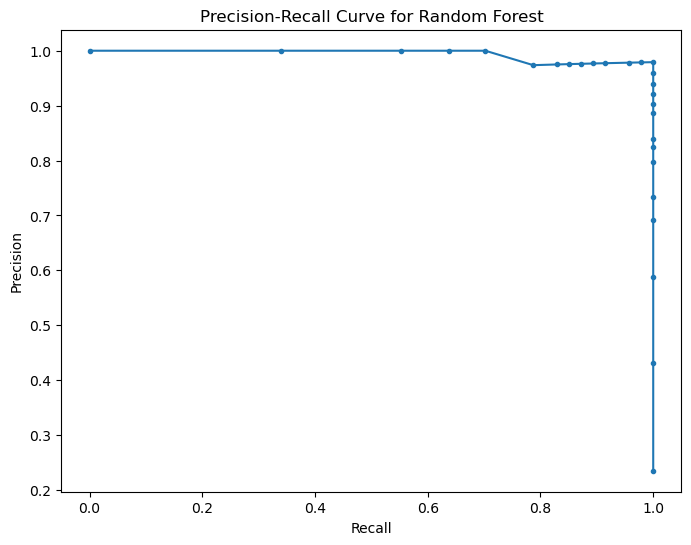

In [47]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (Leak)
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_rf)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve for Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# Visualize learning_curve

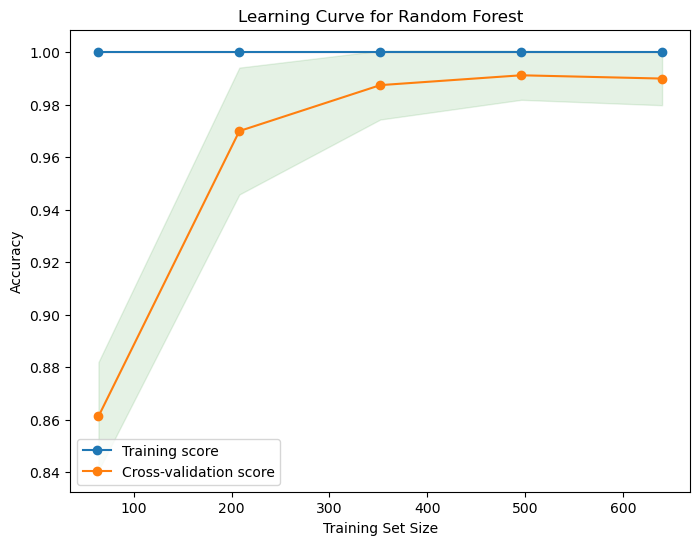

In [49]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-validation score', marker='o')

# Plot the filled area for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Visualize Individual Trees in the Random Forest

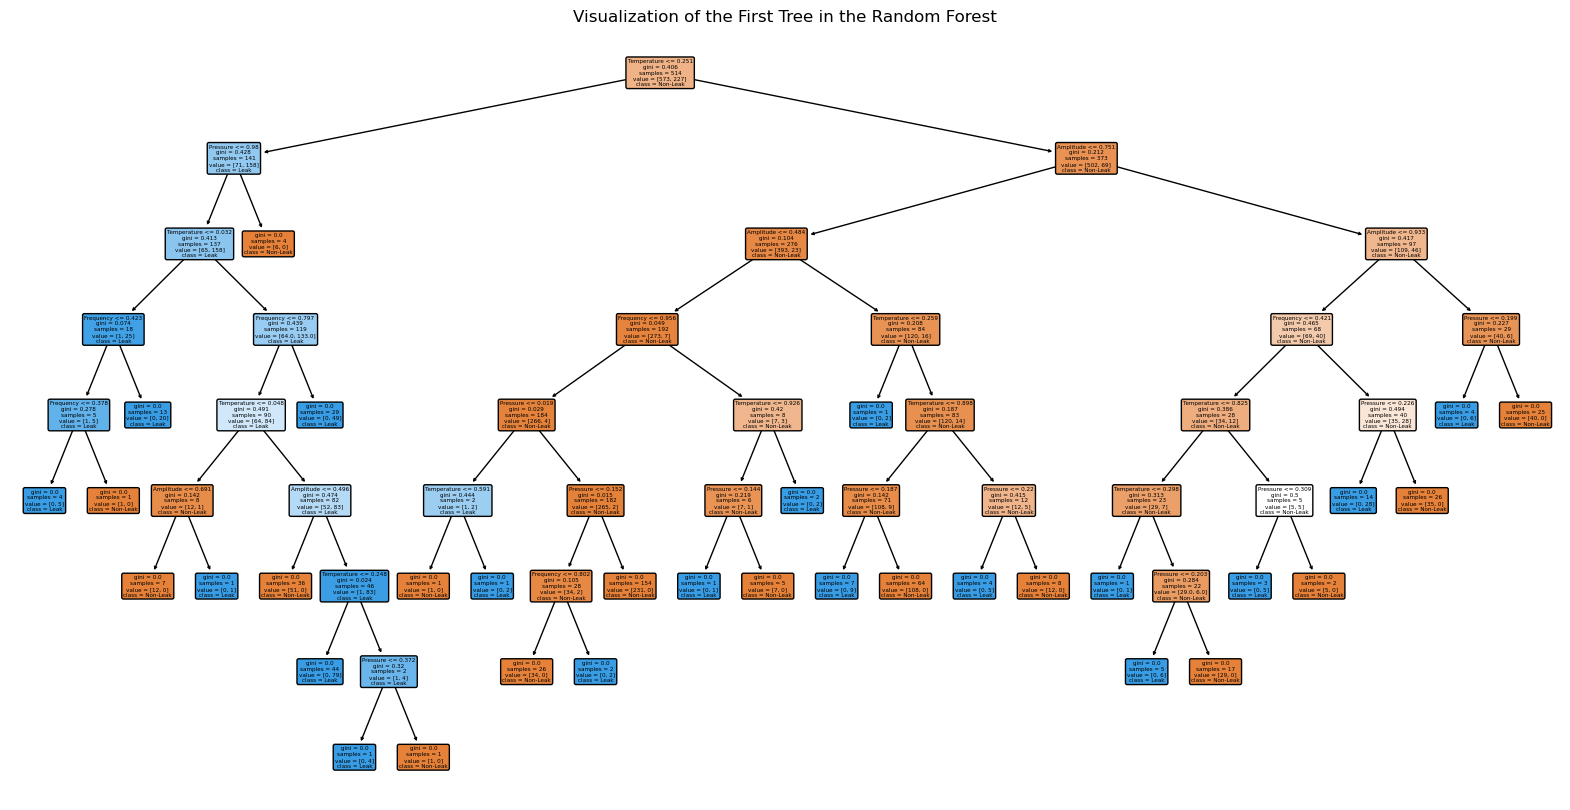

In [55]:
from sklearn.tree import plot_tree

# Extract the first tree from the random forest
first_tree = rf_model.estimators_[0]

# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(first_tree, filled=True, feature_names=X.columns, class_names=['Non-Leak', 'Leak'], rounded=True)
plt.title('Visualization of the First Tree in the Random Forest')
plt.show()


# Visualize Multiple Trees

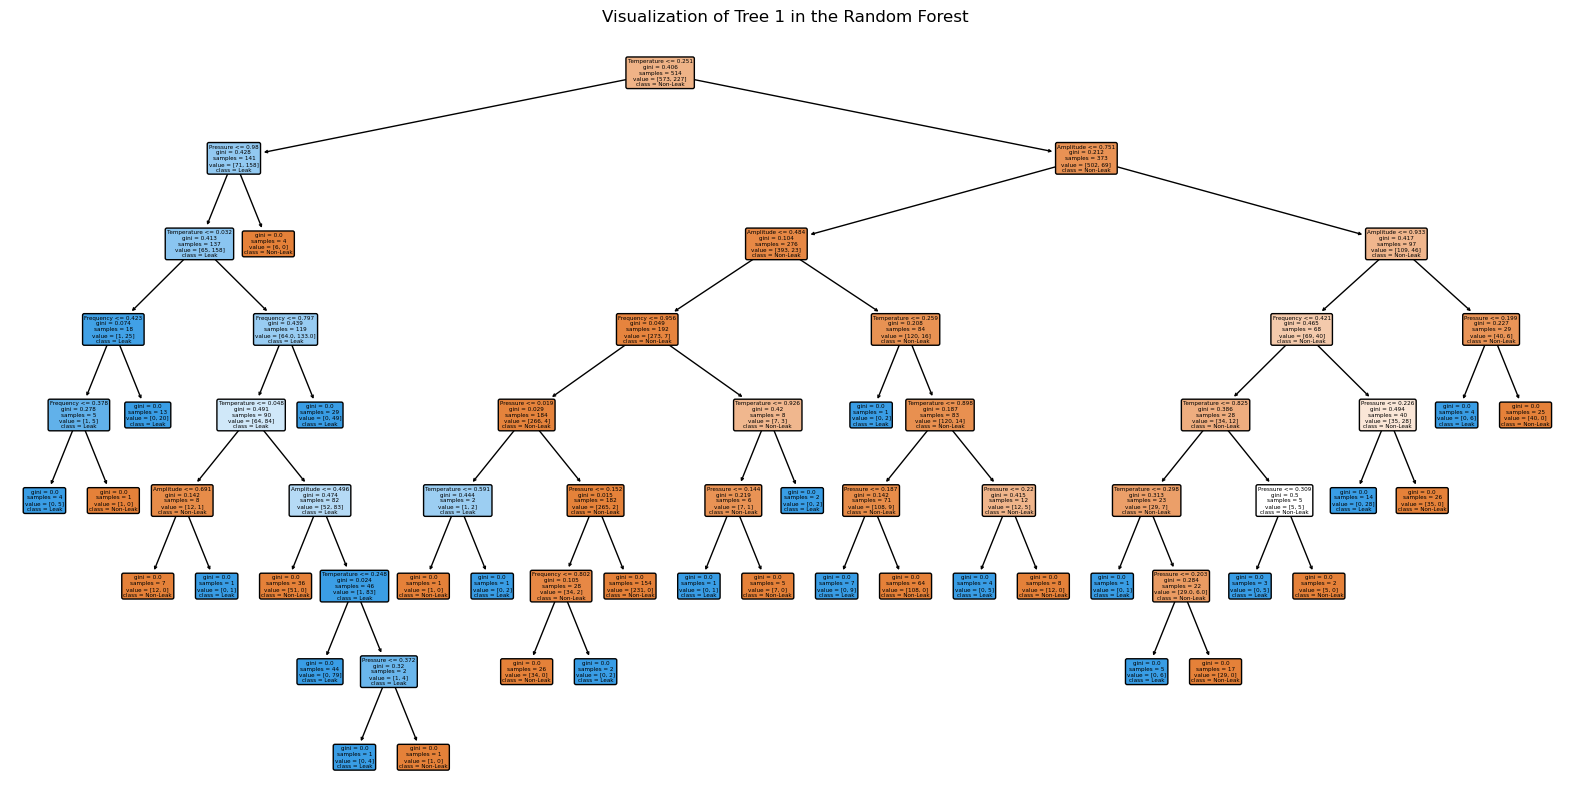

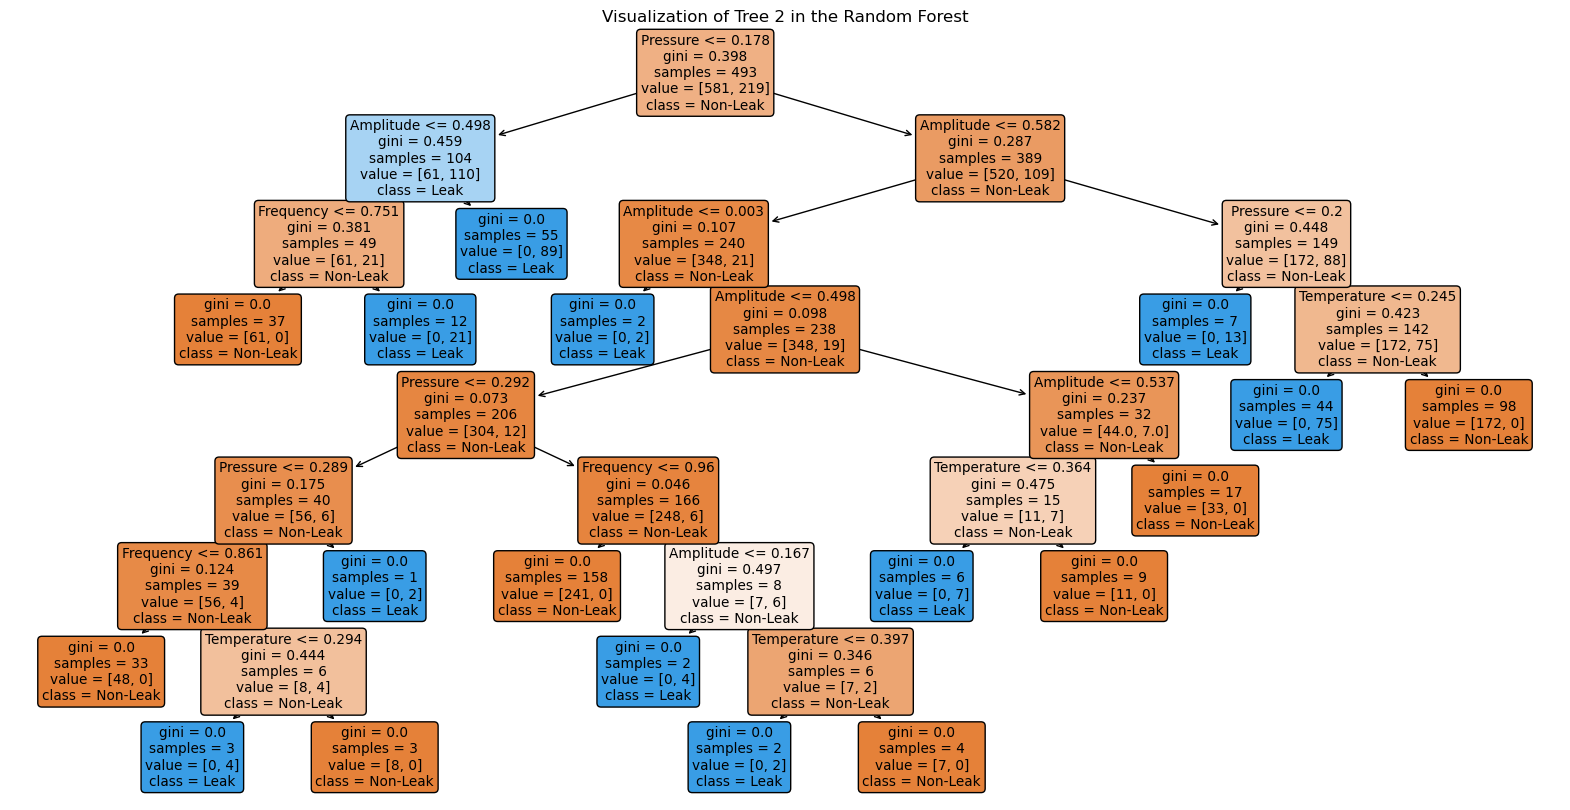

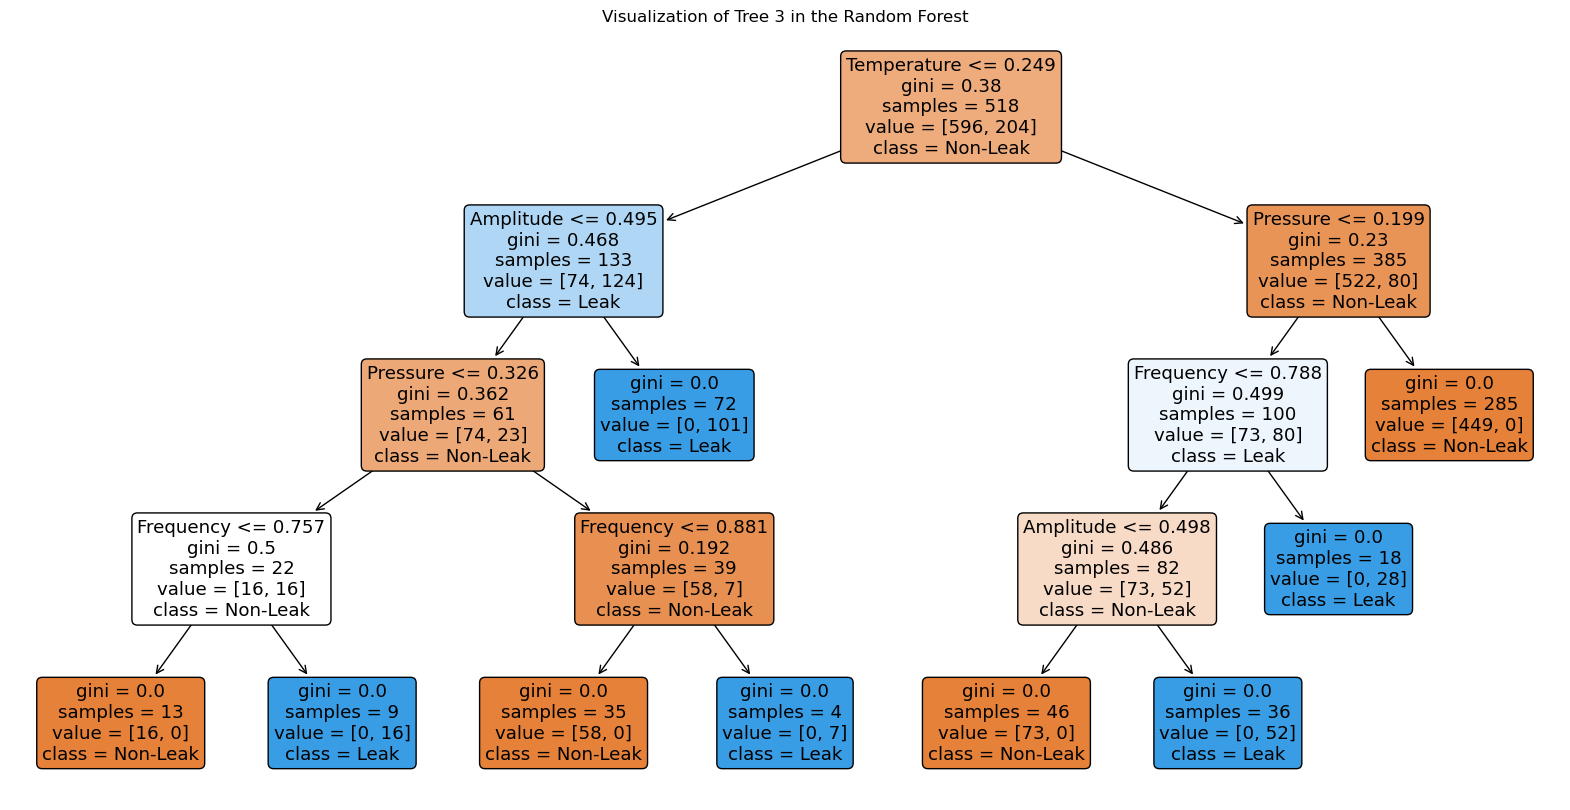

In [59]:
num_trees_to_plot = 3  # Number of trees to plot

for i in range(num_trees_to_plot):
    plt.figure(figsize=(20,10))
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=X.columns, class_names=['Non-Leak', 'Leak'], rounded=True)
    plt.title(f'Visualization of Tree {i+1} in the Random Forest')
    plt.show()


# Feature Importance

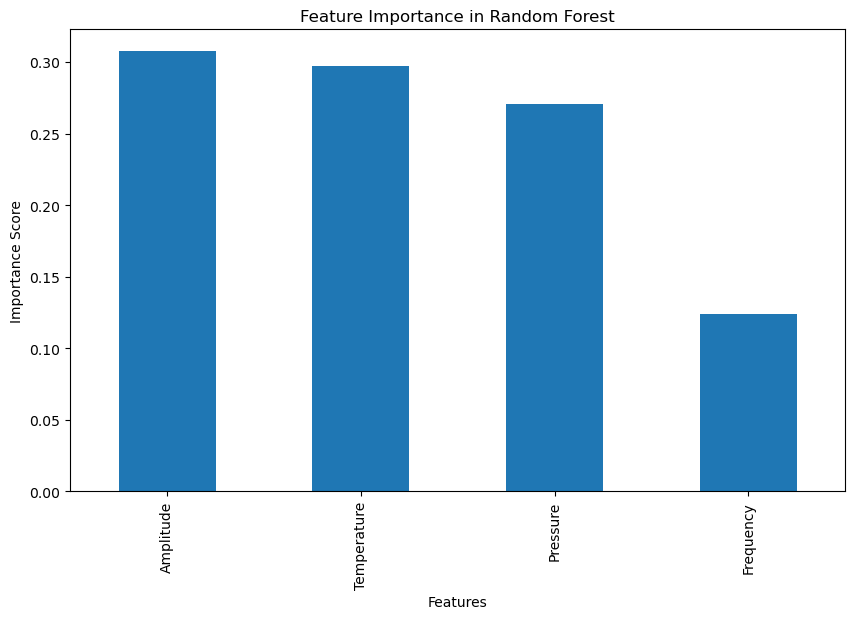

In [62]:
import pandas as pd

# Get feature importances from the Random Forest model
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Partial Dependence Plots (PDPs)

Partial Dependence Plots show the relationship between a feature and the predicted outcome, while averaging out the effects of other features.

In [68]:
from sklearn.inspection import plot_partial_dependence

# Plot Partial Dependence Plots for selected features
features = [0, 1]  # Index of features you want to plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(rf_model, X_train_scaled, features, ax=ax)
plt.title('Partial Dependence Plots')
plt.show()


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

# Error Analysis

Visualize prediction errors to understand where the model might be making mistakes.

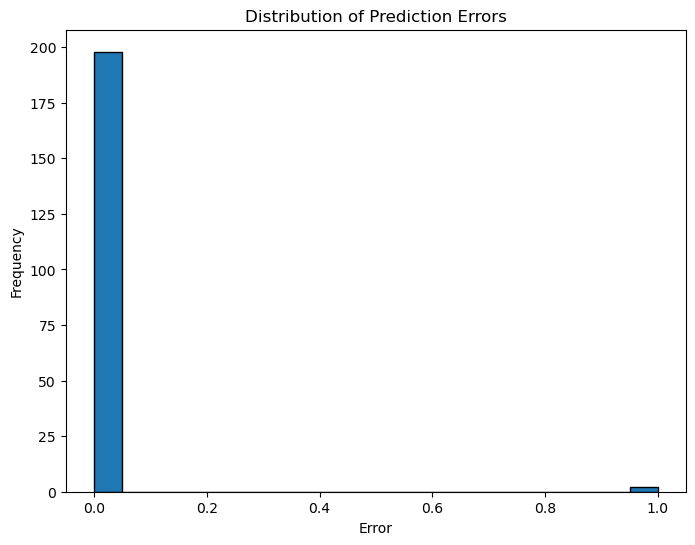

In [71]:
import numpy as np

# Get errors
errors = np.abs(y_test - y_pred_rf)

# Plot distribution of errors
plt.figure(figsize=(8,6))
plt.hist(errors, bins=20, edgecolor='k')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


# Out-of-Bag (OOB) Error

Random Forest can provide an estimate of the model's performance on unseen data using the Out-of-Bag samples.

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with oob_score=True
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Compute and print the OOB score
oob_score = rf_model.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')


Out-of-Bag Score: 0.99


C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


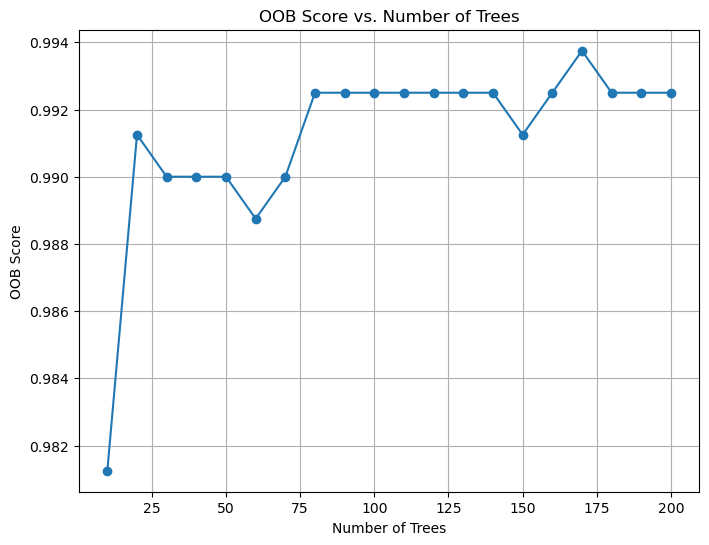

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# List of different numbers of trees to evaluate
n_estimators_range = np.arange(10, 210, 10)
oob_scores = []

for n in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=1)
    rf_model.fit(X_train_scaled, y_train)
    oob_scores.append(rf_model.oob_score_)

# Plot OOB scores as a function of number of trees
plt.figure(figsize=(8,6))
plt.plot(n_estimators_range, oob_scores, marker='o')
plt.title('OOB Score vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.grid(True)
plt.show()


# Feature Importance Plot for OOB error

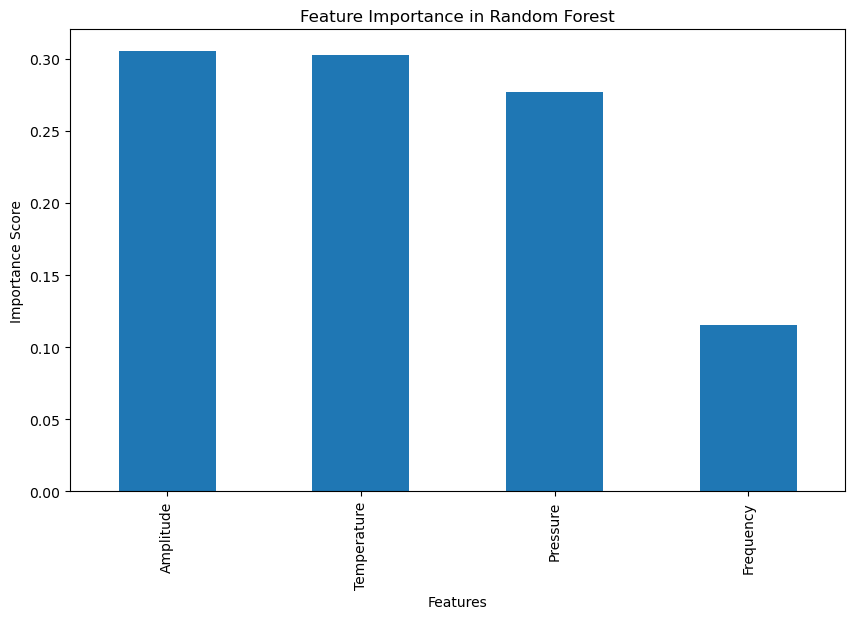

In [84]:
import pandas as pd

# Extract feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Cross-Validation Scores

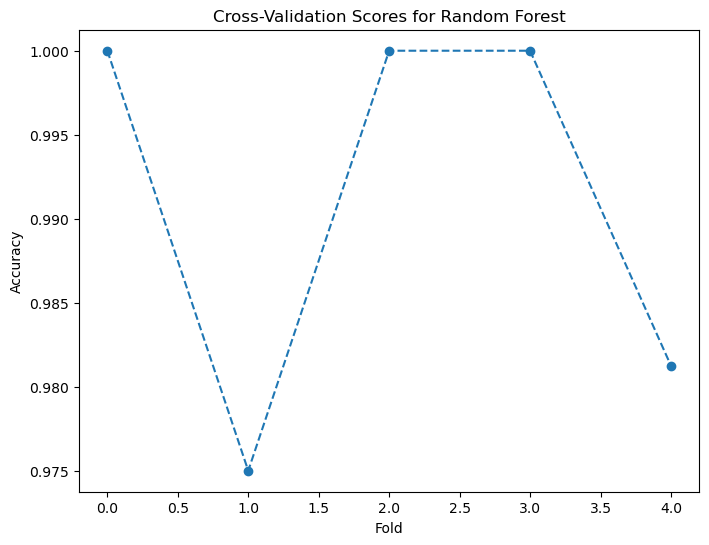

In [87]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Plot cross-validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores for Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


# Model Stability and Consistency

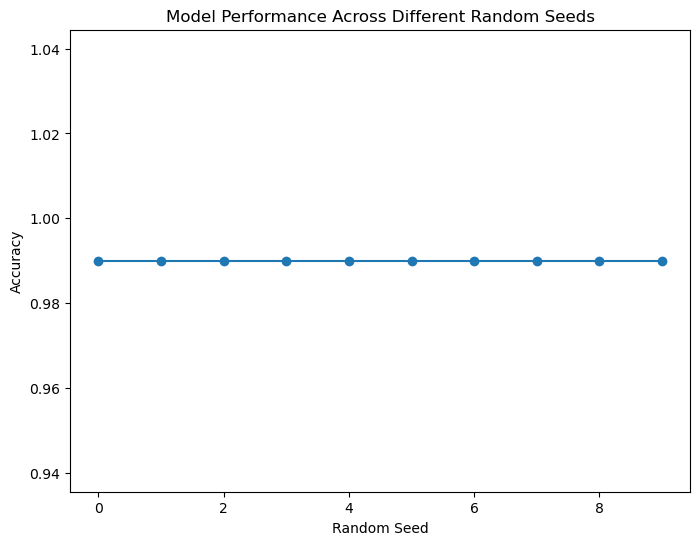

In [90]:
# Train Random Forest with different random seeds and compare performance
performance = []
for seed in range(10):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
    rf_model.fit(X_train_scaled, y_train)
    y_pred_rf = rf_model.predict(X_test_scaled)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    performance.append(accuracy_rf)

plt.figure(figsize=(8,6))
plt.plot(performance, marker='o')
plt.title('Model Performance Across Different Random Seeds')
plt.xlabel('Random Seed')
plt.ylabel('Accuracy')
plt.show()


# Validation Curve

This shows how the model’s performance changes with varying hyperparameters.

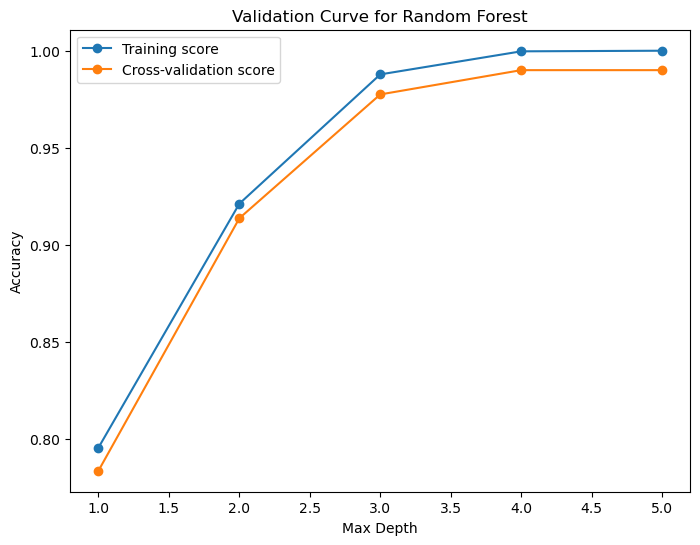

In [93]:
from sklearn.model_selection import validation_curve

# Compute validation curve for a hyperparameter
param_range = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=100, random_state=1),
    X_train_scaled, y_train,
    param_name='max_depth', param_range=param_range,
    cv=5, scoring='accuracy'
)

# Plot validation curve
plt.figure(figsize=(8,6))
plt.plot(param_range, train_scores.mean(axis=1), label='Training score', marker='o')
plt.plot(param_range, test_scores.mean(axis=1), label='Cross-validation score', marker='o')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
